### Exploratory Data Analysis
This notebook concerns the Exploratory Data Analysis of our Dataset. The goal is to explore and to understand our Data better

In [1]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in Data
df = pd.read_csv('../Data/bank_mkt_train.csv')

In [2]:
# Quick Look
df.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,...,4.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45.0,services,married,high.school,no,yes,no,cellular,apr,...,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45.0,unknown,married,unknown,unknown,unknown,unknown,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


#### General Information about the Data

In [3]:
# how many client do we have?
df.client_id.nunique()

20000

In [6]:
# missing Information & Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       20000 non-null  int64  
 1   age             19798 non-null  float64
 2   job             19839 non-null  object 
 3   marital         19801 non-null  object 
 4   education       19830 non-null  object 
 5   default         19786 non-null  object 
 6   housing         19805 non-null  object 
 7   loan            19781 non-null  object 
 8   contact         19783 non-null  object 
 9   month           19801 non-null  object 
 10  day_of_week     19815 non-null  object 
 11  campaign        19797 non-null  float64
 12  pdays           19815 non-null  float64
 13  previous        19791 non-null  float64
 14  poutcome        19825 non-null  object 
 15  emp.var.rate    19835 non-null  float64
 16  cons.price.idx  19819 non-null  float64
 17  cons.conf.idx   19803 non-null 

In [8]:
# Descriptive Stats
df.describe()

,client_id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
count,20000.000000,19798.000000,19797.000000,19815.000000,19791.000000,19835.000000,19819.000000,19803.000000,19796.000000,19816.000000,20000.000000
mean,20683.031650,40.054096,2.580189,961.413222,0.171745,0.088440,93.576248,-40.471661,3.632587,5167.337010,0.113550
std,11898.274235,10.415501,2.787989,189.512187,0.494908,1.573075,0.579978,4.622281,1.730864,72.259166,0.317272
min,2.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,10311.750000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,20761.500000,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000,0.000000
75%,30993.250000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,41188.000000,98.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


#### Demographical Analysis

In [11]:
df['age group'] = df['age'] // 10*10

df.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,age group
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,...,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0,40.0
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,...,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0,30.0
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,...,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0,40.0
3,9642,45.0,services,married,high.school,no,yes,no,cellular,apr,...,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0,40.0
4,14183,45.0,unknown,married,unknown,unknown,unknown,unknown,telephone,may,...,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,40.0


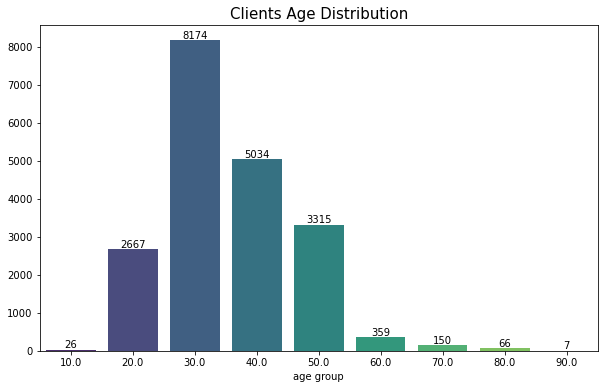

In [43]:
# Age Distribution
temp = df.copy()

fig, ax = plt.subplots(figsize = (10,6))

ax = sns.countplot(data = temp, x="age group",  palette ='viridis')
ax.set_title('Clients Age Distribution', fontsize = 15)
ax.set_ylabel('')
# annotation here
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

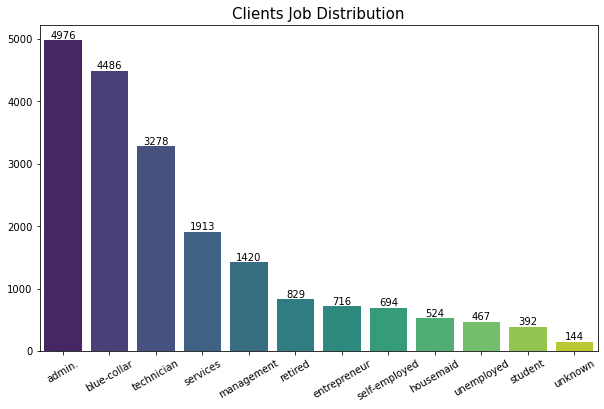

In [42]:
# Job Distribution

order = df.groupby('job').size().sort_values().index[::-1]

fig, ax = plt.subplots(figsize = (10,6))

ax = sns.countplot(data = df, x="job", order = order, palette ='viridis')
ax.set_title('Clients Job Distribution', fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xlabel('')
ax.set_ylabel('')
# annotation here
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

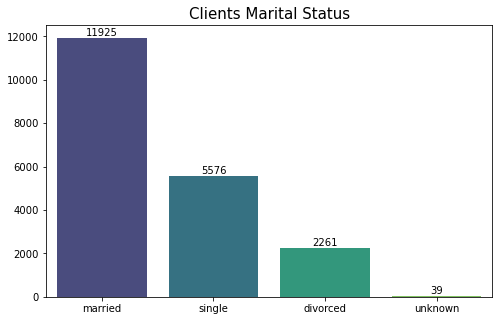

In [41]:
# Marital Status
fig, ax = plt.subplots(figsize = (8,5))

ax = sns.countplot(data = df, x="marital", palette ='viridis')
ax.set_title('Clients Marital Status', fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('')
# annotation here
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

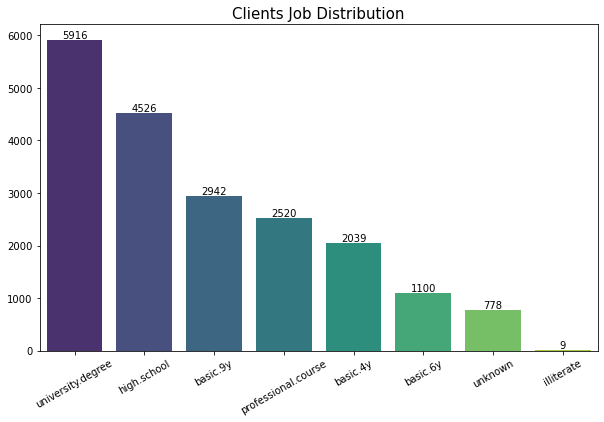

In [45]:
# Job Distribution

order = df.groupby('education').size().sort_values().index[::-1]

fig, ax = plt.subplots(figsize = (10,6))

ax = sns.countplot(data = df, x="education", order = order, palette ='viridis')
ax.set_title('Clients Education Distribution', fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xlabel('')
ax.set_ylabel('')
# annotation here
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

#### Bank Related Informations

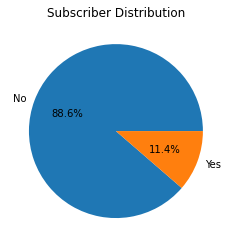

In [48]:
# subscribers

temp = df.copy()
temp.subscribe = temp.subscribe.replace({1:'Yes', 0:'No'})

clr = temp.groupby('subscribe')['client_id'].count()
plt.pie(clr, labels=clr.index, autopct='%1.1f%%')
plt.title('Subscriber Distribution')
plt.show()

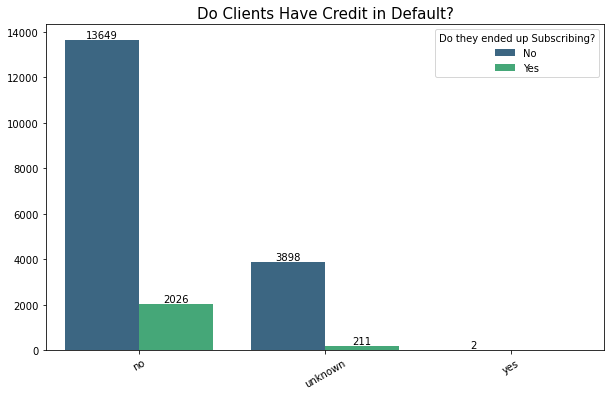

In [59]:
# credit default
temp = df.copy()
temp.subscribe = temp.subscribe.replace({1:'Yes', 0:'No'})

fig, ax = plt.subplots(figsize = (10,6))

ax = sns.countplot(data = temp, x="default", hue = "subscribe", palette ='viridis')
ax.set_title('Do Clients Have Credit in Default?', fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title = 'Do they ended up Subscribing?', loc = 'upper right')
# annotation here
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

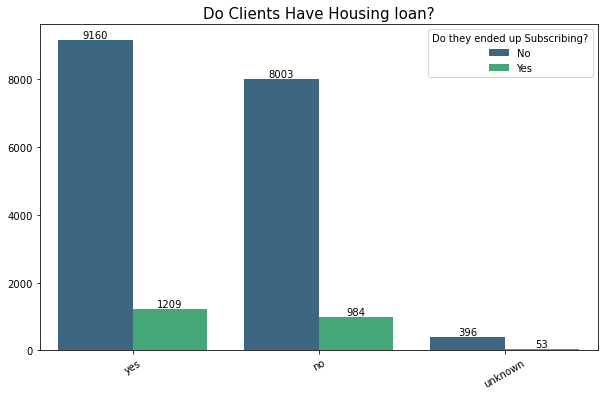

In [60]:
# Housing Loan
temp = df.copy()
temp.subscribe = temp.subscribe.replace({1:'Yes', 0:'No'})

order = temp.groupby('housing').size().sort_values().index[::-1]

fig, ax = plt.subplots(figsize = (10,6))

ax = sns.countplot(data = temp, x="housing", hue = "subscribe", order = order, palette ='viridis')
ax.set_title('Do Clients Have Housing loan?', fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title = 'Do they ended up Subscribing?', loc = 'upper right')
# annotation here
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

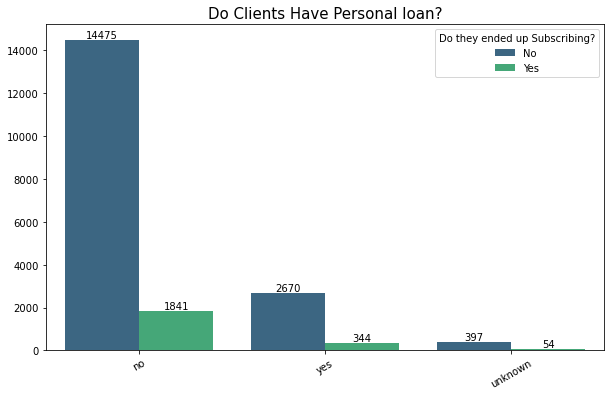

In [61]:
# Personal Loan
temp = df.copy()
temp.subscribe = temp.subscribe.replace({1:'Yes', 0:'No'})

#order = temp.groupby('housing').size().sort_values().index[::-1]

fig, ax = plt.subplots(figsize = (10,6))

ax = sns.countplot(data = temp, x="loan", hue = "subscribe", palette ='viridis')
ax.set_title('Do Clients Have Personal loan?', fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title = 'Do they ended up Subscribing?', loc = 'upper right')
# annotation here
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

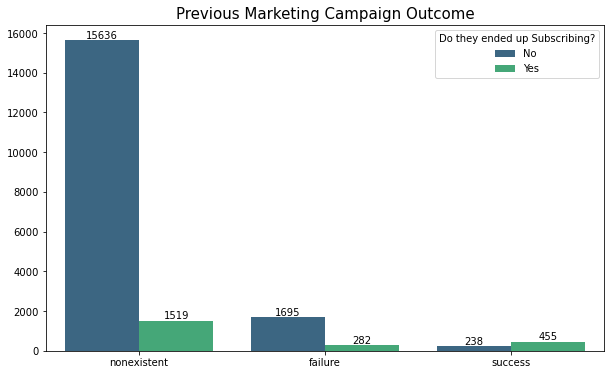

In [93]:
# Previous Marketing Campaign
temp = df.copy()
temp.subscribe = temp.subscribe.replace({1:'Yes', 0:'No'})

#order = temp.groupby('housing').size().sort_values().index[::-1]

fig, ax = plt.subplots(figsize = (10,6))

ax = sns.countplot(data = temp, x="poutcome", hue = "subscribe", palette ='viridis')
ax.set_title('Previous Marketing Campaign Outcome', fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title = 'Do they ended up Subscribing?', loc = 'upper right')
# annotation here
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

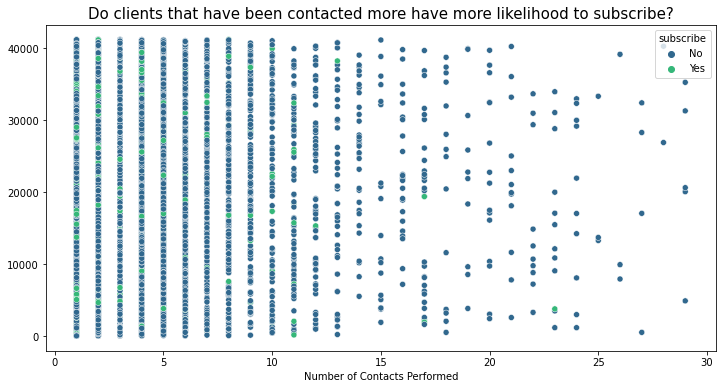

In [74]:
# try to see if theres a relation between number of contacts and its likelihood in subscribing
temp = df.copy()
temp = temp[temp['campaign'] < 30]
temp.subscribe = temp.subscribe.replace({1:'Yes', 0:'No'})


fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.scatterplot(data=temp, y="client_id", x="campaign", hue ='subscribe',palette = 'viridis')
ax.set_xlabel('Number of Contacts Performed')
ax.set_ylabel('')
plt.title('Do clients that have been contacted more have more likelihood to subscribe?', fontsize = 15)

plt.show()

#### Social & Economic Context Attributes
We examine this to check whether there are any irregular pattern / outliers

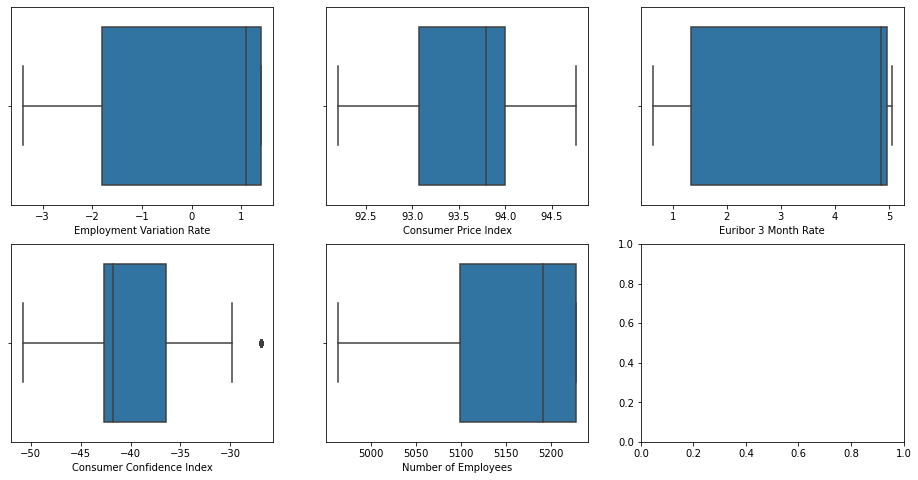

In [90]:
fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(16, 8))

sns.boxplot(x="emp.var.rate", data=df, ax = axs[0,0])
axs[0,0].set_xlabel('Employment Variation Rate')

sns.boxplot(x="cons.price.idx", data=df, ax = axs[0,1])
axs[0,1].set_xlabel('Consumer Price Index')

sns.boxplot(x="euribor3m", data=df, ax = axs[0,2])
axs[0,2].set_xlabel('Euribor 3 Month Rate')

sns.boxplot(x="cons.conf.idx", data=df, ax = axs[1,0])
axs[1,0].set_xlabel('Consumer Confidence Index')

sns.boxplot(x="nr.employed", data=df, ax = axs[1,1])
axs[1,1].set_xlabel('Number of Employees')


plt.show()